In [7]:
import requests
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
query = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/fr.wikipedia/mobile-web/user/hourly/2016010100/2017010100"
req_json = requests.get(query).json()

In [11]:
data = pd.DataFrame.from_dict(req_json["items"]).drop(["access", "agent", "granularity", "project"], axis=1)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y%m%d%H")
data = data.set_index('timestamp')
data.head()

,views
timestamp,
2016-01-01 00:00:00,529397
2016-01-01 01:00:00,412739
2016-01-01 02:00:00,286672
2016-01-01 03:00:00,196932
2016-01-01 04:00:00,142995


In [13]:
# Comment to have real value
data["views"] = StandardScaler().fit_transform(data)

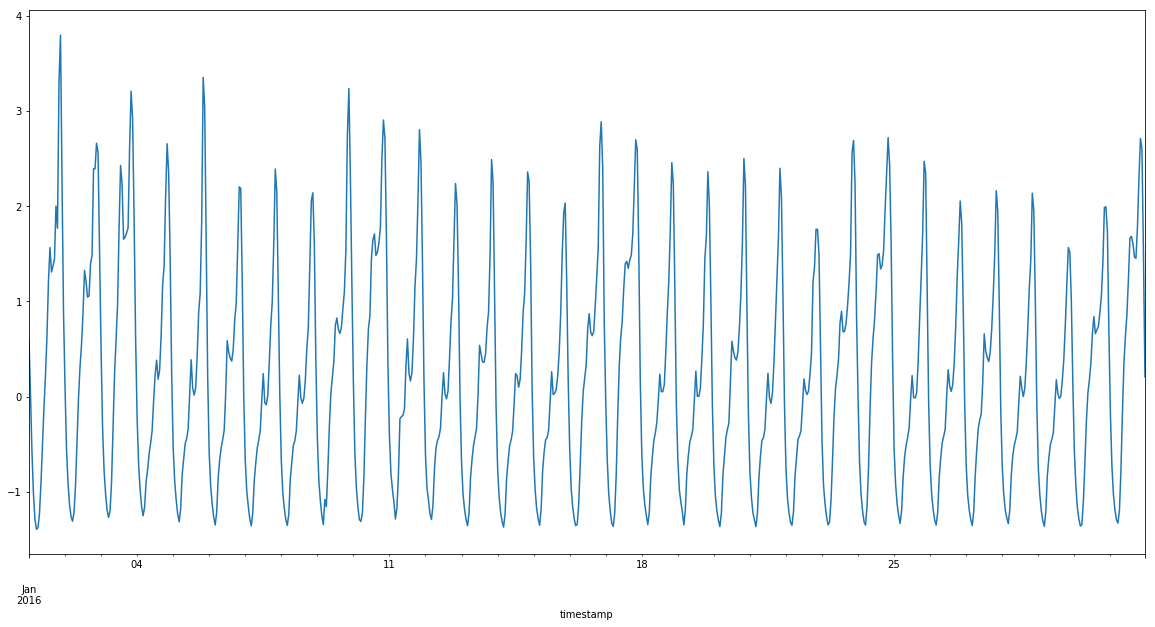

In [14]:
plt.figure(figsize=(20,10))
data.iloc[:24*31].views.plot.line()
plt.show()

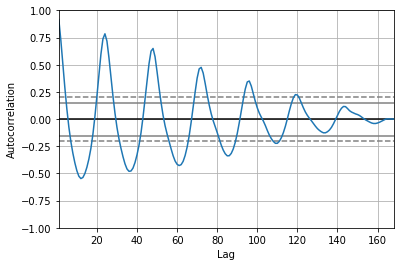

In [15]:
autocorrelation_plot(data.views.iloc[:24*7])
plt.show()